<a href="https://colab.research.google.com/github/rtdatasci/Python/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# tensor flow image classification
#https://www.tensorflow.org/tutorials/keras/classification

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#explore data
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

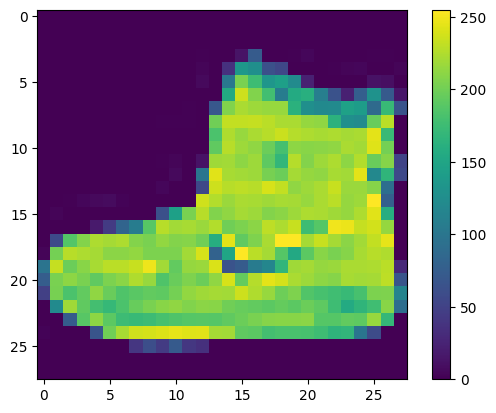

In [ ]:
# preprocess data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#scale or normalize
train_images = train_images / 255.0

test_images = test_images / 255.0

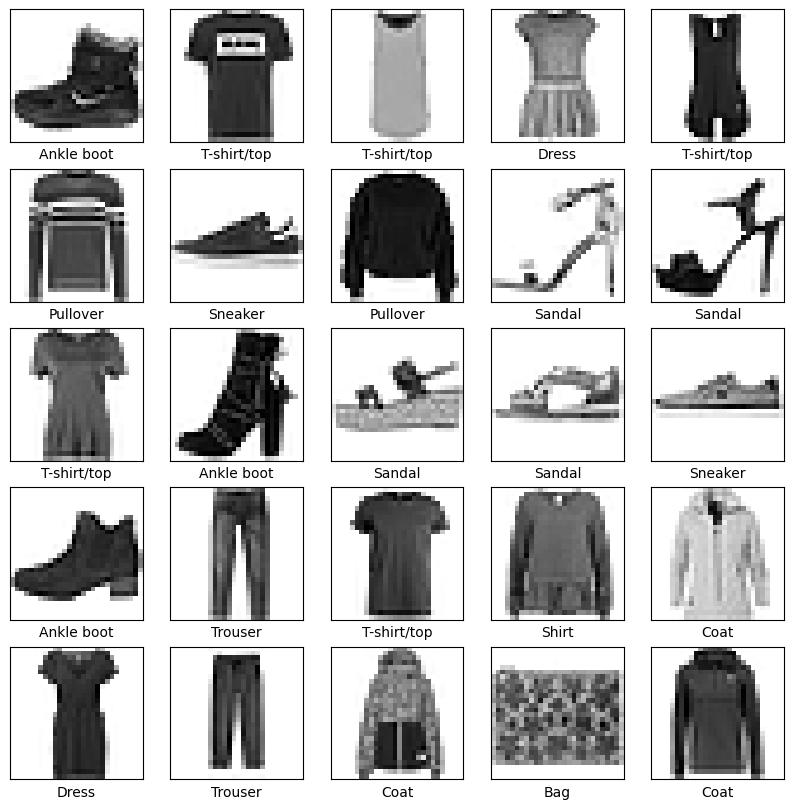

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#build model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#train then fit
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5031 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3777 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3396 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3111 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2962 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2815 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2682 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2567 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2490 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 

In [ ]:
#evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3359 - accuracy: 0.8819 - 639ms/epoch - 2ms/step

Test accuracy: 0.8819000124931335


In [ ]:
#make prediction
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# look at the first prediction
predictions[0]

array([5.2137921e-07, 4.1465682e-08, 1.0450162e-09, 1.1033514e-08,
       8.8927061e-09, 1.1336666e-03, 5.3367671e-07, 4.8682620e-03,
       3.3411828e-07, 9.9399662e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
#graph to look at 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

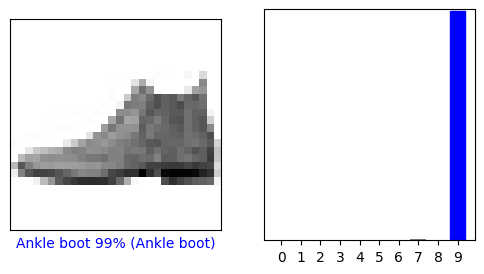

In [ ]:
#verify prediction
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

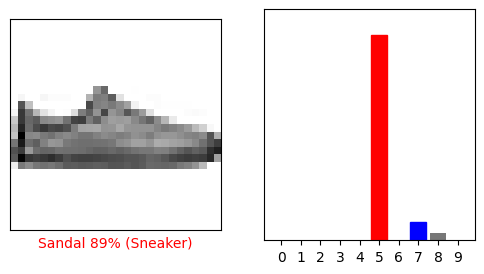

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

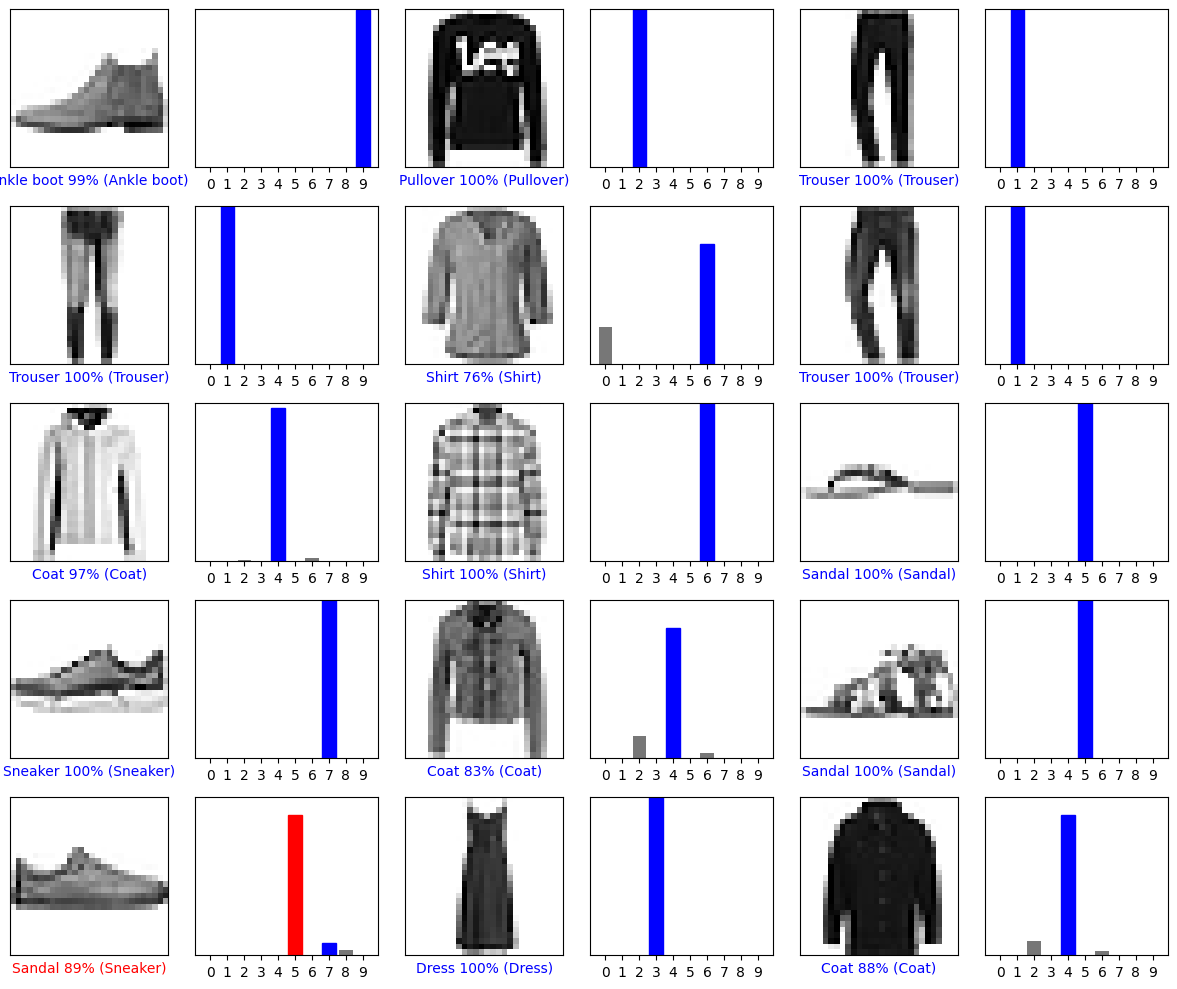

In [ ]:
# plot several images with predictions
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
#Finally, use the trained model to make a prediction about a single image.

# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
#Now predict the correct label for this image:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 30ms/step
[[6.9994694e-06 5.0783804e-12 9.9935013e-01 7.9276669e-11 3.6818348e-04
  7.6220384e-12 2.7467337e-04 3.2690021e-15 1.2592585e-10 4.8966412e-14]]


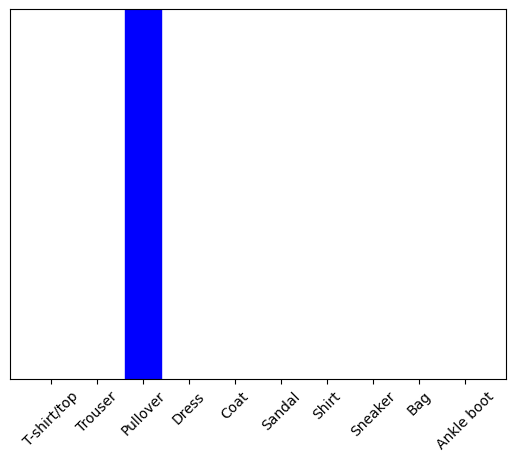

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2